# Naive Bayes

**Overview**
* Group of extremely fast and simple classification algorithms
* Often suitable for very high-dimensional datasets
* Because they are so fast and have so few tunable parameters, they end up being very useful as a 'quick-and-dirty' baseline for a classification problem.
* Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

Different types of naive Bayes classifiers rest on different naive assumptions about the data:
*  The Gaussian naive Bayes classifier makes the assumption that data from each label is drawn from a simple Gaussian distribution. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
* For the multinomial naive Bayes, the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates. One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

**When to use Naive Bayes:**

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

* When the naive assumptions actually match the data (very rare in practice)
* For very well-separated categories, when model complexity is less important
* For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

### Coding Example 1: Iris Dataset

In [78]:
# Importing the basic libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [79]:
# Loading the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [80]:
# Finding two features of the dataset that are suitable for the Naive Bayes algorithm
# By using just two features, 2D-plotting is possible
X1 = X[:, 0:2]
X2 = X[:, 1:3]
X3 = X[:, 2:4]

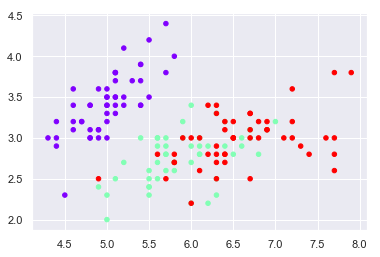

In [81]:
plt.scatter(X1[:, 0], X1[:, 1], c=y, s=20, cmap='rainbow');

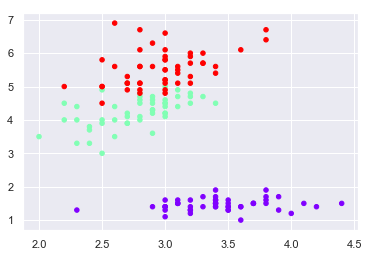

In [82]:
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=20, cmap='rainbow');

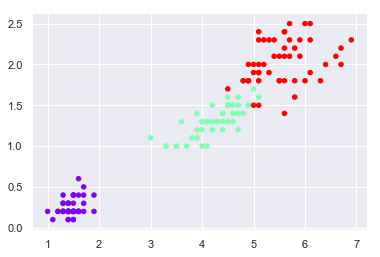

In [83]:
plt.scatter(X3[:, 0], X3[:, 1], c=y, s=20, cmap='rainbow');

X2 will be chosen for the application of the Naive Bayes algorithm as it looks suitable for our task.

In [84]:
# Splitting the dataset with the two features into train and test datasets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y, random_state=1)

In [85]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain);                 # 3. fit model to data

In [92]:
# Creating some random data for showing the borders of the classification in a graph
rng = np.random.RandomState(0)
Xnew = [1.6, 0.8] + [3, 6.5] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

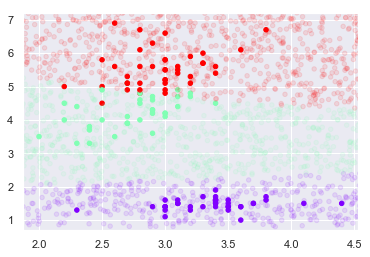

In [93]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, s=20, cmap='rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='rainbow', alpha=0.1)
plt.axis(lim);

In [94]:
# Checking the prediction quality with the test data
ypred = model.predict(Xtest)               # 4. predict on new data

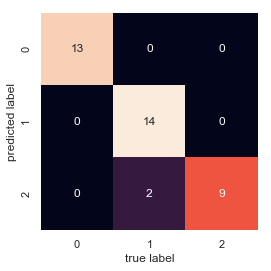

In [95]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9473684210526315

### Coding Example 2: Self-made data with make_blobs

Part 1: 2 blobs

In [42]:
# Importing the basic libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

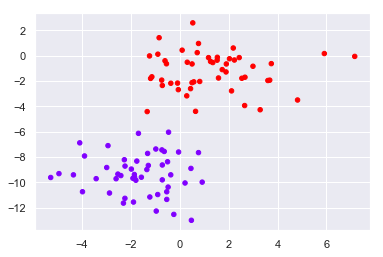

In [47]:
# Creating the blob dataset and plotting it
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow');

[(-15, 5), (-8, 8)]

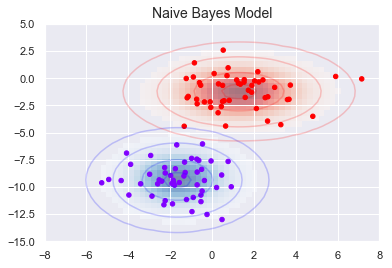

In [48]:
# Visualizing the Gaussian distribution assumption with no covariance between dimensions.
# The ellipses represent the Gaussian generative model for each label, 
# with larger probability toward the center of the ellipses.

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'red']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

In [50]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [51]:
from sklearn.naive_bayes import GaussianNB      # 1. choose model class
model = GaussianNB()                            # 2. instantiate model
model.fit(X, y);                                # 3. fit model to data

In [52]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
print(Xnew.shape)
print(ynew.shape)

(2000, 2)
(2000,)


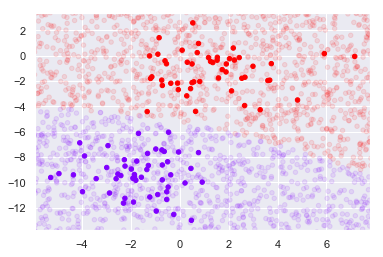

In [53]:
# Creating some random data for showing the borders of the classification in a graph
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='rainbow', alpha=0.1)
plt.axis(lim);

In [8]:
# Checking the probabilities that a point from the dataset is predicted to be
# in a specific class
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

Part 2: 3 blobs (uncommented, see comments above)

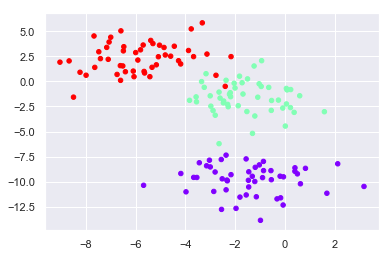

In [54]:
X3, y3 = make_blobs(150, 3, centers=3, random_state=2, cluster_std=1.5)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=20, cmap='rainbow');

In [55]:
print(X3.shape)
print(y3.shape)

(150, 3)
(150,)


In [56]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X3, y3);

In [74]:
rng = np.random.RandomState(0)
X3new = [-9.4, -14, -17] + [14, 20.5, 26] * rng.rand(3000, 3)
y3new = model3.predict(X3new)
print(X3new.shape)
print(y3new.shape)

(3000, 3)
(3000,)


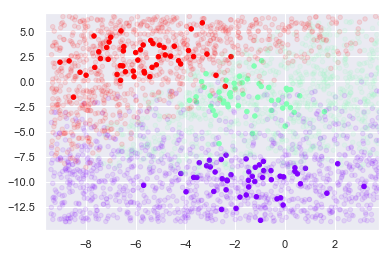

In [75]:
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=20, cmap='rainbow')
lim = plt.axis()
plt.scatter(X3new[:, 0], X3new[:, 1], c=y3new, s=20, cmap='rainbow', alpha=0.1)
plt.axis(lim);

In [59]:
y3prob = model3.predict_proba(X3new)
y3prob[-8:].round(3)

array([[0.   , 0.901, 0.099],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.005, 0.995, 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.981, 0.019],
       [0.005, 0.   , 0.995]])

### Coding Example 3: Classifying Text

In [97]:
# Importing the dataset and checking the included categories
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [98]:
# Selecting a few of these categories, and download the training and testing set:
categories = ['rec.autos', 'talk.politics.guns',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this the TF-IDF vectorizer is used and a pipeline is created that attaches it to a multinomial naive Bayes classifier:

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # 1. choose model class
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) # 2. instantiate model

In [100]:
model.fit(train.data, train.target) # 3. fit model to data
labels = model.predict(test.data)   # 4. predict on new data

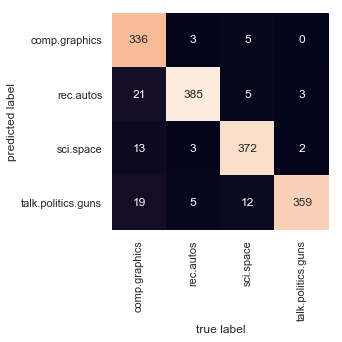

In [101]:
# Checking the prediction quality
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(test.target, labels)

0.9410239792611795

Trying out the model:

In [103]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [104]:
predict_category('sending a payload to the ISS')

'sci.space'

In [107]:
predict_category('horsepower')

'rec.autos'

In [108]:
predict_category('determining the screen resolution')

'comp.graphics'